In [176]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from html.parser import HTMLParser
import matplotlib.pyplot as plt
import matplotlib as mtp
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
import copy


In [131]:
mtp.rcParams['figure.figsize'] = [15, 15]
sns.set_context('paper', font_scale=2)

In [132]:
data = pd.read_csv('/mnt/d/ergo/dialogues.tsv', sep='\t', header=0)

In [133]:
data.dialogue[3]

'<span class=participant_2>Пользователь 2: Здравствуйте</span><br /><span class=participant_2>Пользователь 2: Я Леша</span><br /><span class=participant_1>Пользователь 1: Здравствуйте</span><br /><span class=participant_1>Пользователь 1: Я Егор</span><br /><span class=participant_2>Пользователь 2: Я учусь в 6 классе</span><br /><span class=participant_1>Пользователь 1: А мне 30 и я уже работаю</span><br /><span class=participant_2>Пользователь 2: А я тоже хочу. На машину скопить.</span><br /><span class=participant_1>Пользователь 1: Правда мне не нравится моя работа</span><br /><span class=participant_2>Пользователь 2: Почему?</span><br /><span class=participant_1>Пользователь 1: Мало платят</span><br /><span class=participant_1>Пользователь 1: На семью не хватает</span><br /><span class=participant_1>Пользователь 1: Жена и трое детей</span><br /><span class=participant_2>Пользователь 2: А... а я на машину...</span><br /><span class=participant_2>Пользователь 2: Ого</span><br />'

In [134]:
phrases = []

In [135]:
class DataParser(HTMLParser):
    def handle_data(self, data):
        splitted = data.split(':')
        
        filtered =  re.sub("[^\u0430-\u044F ]", "", ''.join(splitted[1:]).lower())
        phrases.append(filtered)

In [136]:
parser = DataParser()

In [137]:
for episode in data["dialogue"].to_numpy().tolist():
    parser.feed(episode)

In [138]:
phrases[101]

' я продавец выращиванию овощи и фрукты на даче и продаю'

In [139]:
firstDimenstion = dict()

In [140]:
def incOrAdd(key, dictionary):
    if key not in dictionary:
        dictionary[key] = 1
    else: 
        dictionary[key] += 1

In [141]:
for phrase in phrases:
    for symb in phrase:
        if symb != ' ':
            incOrAdd(symb, firstDimenstion)
        
            

In [14]:
firstDimenstion["в"]

220827

In [178]:
labels = [['й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ'], 
             ['ф', 'ы', 'в', 'а', 'п', 'р', 'о', 'л', 'д', 'ж', 'э', ''],
              ['я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю', '', '', '']]

In [143]:
depth = []
for row in labels: 
    drow = []
    for label in row:
        if label != '':
            drow.append(firstDimenstion[label])
        else: 
            drow.append(0)
    depth.append(drow)


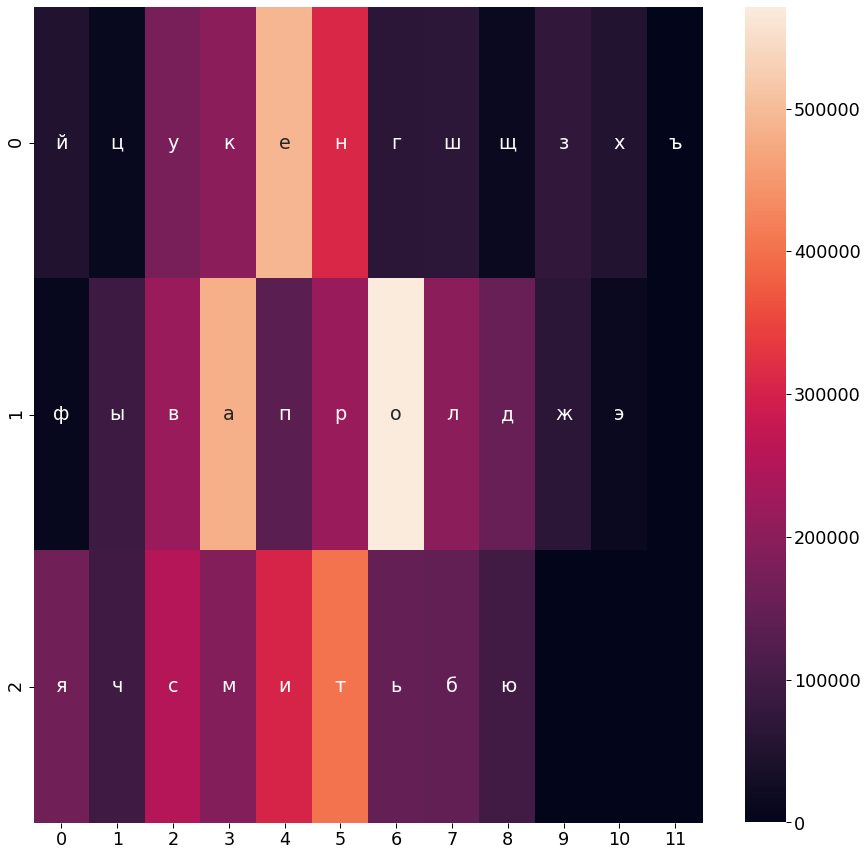

In [17]:
fig, ax = plt.subplots()
ax = sns.heatmap(np.array(depth), annot = np.array(labels), fmt = '')

In [144]:
groups = ["йфя","цыч","увс","камепи","нртгоь","шлб","щдю","зжхэъ"]

In [145]:
def generateSparse(depth):
    sparseDimension = dict()
    for phrase in phrases:
        words = phrase.split(' ')
        for word in words:
            if len(word) > depth:
                length = len(word)
                for i,letter in enumerate(word):
                    if i+depth < length:
                        incOrAdd((letter,word[i+depth]), sparseDimension)
    return sparseDimension
                

In [146]:
sparse = generateSparse(1)

In [147]:
offset = 1072

In [148]:
delta = ord('я') - ord('а') +1

In [149]:
sparseArray = np.zeros((delta, delta))



In [150]:
for key in sparse:
    sparseArray[ord(key[0])-offset][ord(key[1])-offset] = sparse[key]

In [151]:
x_axis_labels = [chr(x) for x in range (offset,offset+delta)]

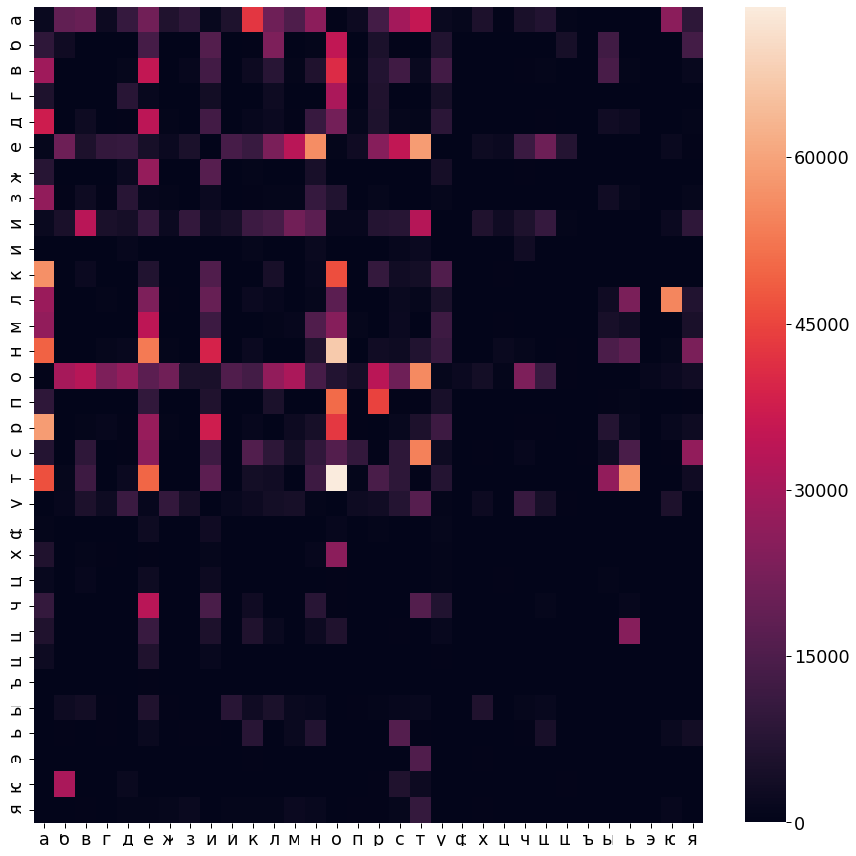

In [26]:
fig, ax = plt.subplots()
ax = sns.heatmap(sparseArray, fmt = '', xticklabels=x_axis_labels, yticklabels=x_axis_labels)

In [152]:
sparDf = pd.DataFrame(sparseArray)

In [153]:
sparDf.columns = x_axis_labels
sparDf.index = x_axis_labels

In [29]:
avg = sparDf.mean().mean()

In [30]:
spRDf = sparDf.drop(sparDf[sparDf.mean() < avg].index)

In [31]:
spRDf = spRDf.drop(spRDf.columns[spRDf.mean() < avg], axis=1)


In [32]:
spRDf

,а,б,в,д,е,и,к,л,м,н,...,р,с,т,у,ч,ш,ы,ь,ю,я
а,1978.0,18663.0,19686.0,10628.0,21409.0,1712.0,42538.0,20817.0,15098.0,25993.0,...,13201.0,29860.0,35444.0,1762.0,4943.0,6710.0,8.0,15.0,25661.0,8837.0
е,888.0,20445.0,5624.0,10611.0,4472.0,241.0,11082.0,22792.0,33432.0,56153.0,...,24872.0,34995.0,58675.0,153.0,11270.0,20411.0,4.0,35.0,1833.0,428.0
и,1882.0,4953.0,33374.0,4041.0,10410.0,3217.0,11714.0,13431.0,21332.0,17510.0,...,7157.0,7686.0,32890.0,231.0,6019.0,10352.0,5.0,23.0,2125.0,9065.0
к,56772.0,26.0,2072.0,49.0,6590.0,15431.0,232.0,4629.0,260.0,1447.0,...,10136.0,3238.0,3800.0,15397.0,13.0,13.0,3.0,7.0,45.0,13.0
л,28417.0,133.0,90.0,178.0,23284.0,19374.0,2252.0,1353.0,79.0,969.0,...,19.0,1725.0,989.0,5347.0,113.0,62.0,2994.0,22918.0,55005.0,6417.0
н,49333.0,119.0,71.0,1708.0,53043.0,39055.0,2175.0,119.0,91.0,6101.0,...,3219.0,2776.0,6410.0,10739.0,1123.0,58.0,14587.0,17595.0,932.0,22871.0
о,318.0,30206.0,33113.0,27201.0,17521.0,5015.0,13026.0,26908.0,31079.0,13655.0,...,33753.0,20687.0,55529.0,893.0,23500.0,10945.0,10.0,20.0,2149.0,3218.0
р,58719.0,253.0,823.0,515.0,27816.0,37617.0,1411.0,195.0,2318.0,4450.0,...,196.0,1437.0,5513.0,11956.0,387.0,518.0,6927.0,1697.0,1584.0,2627.0
с,6991.0,246.0,8958.0,471.0,26056.0,11891.0,15599.0,8750.0,3788.0,9220.0,...,572.0,8639.0,54074.0,2855.0,1198.0,180.0,2661.0,14245.0,438.0,26820.0
т,46784.0,943.0,11831.0,2024.0,49964.0,17719.0,3820.0,3344.0,284.0,11934.0,...,14243.0,8799.0,326.0,6939.0,254.0,37.0,26849.0,57127.0,223.0,2899.0


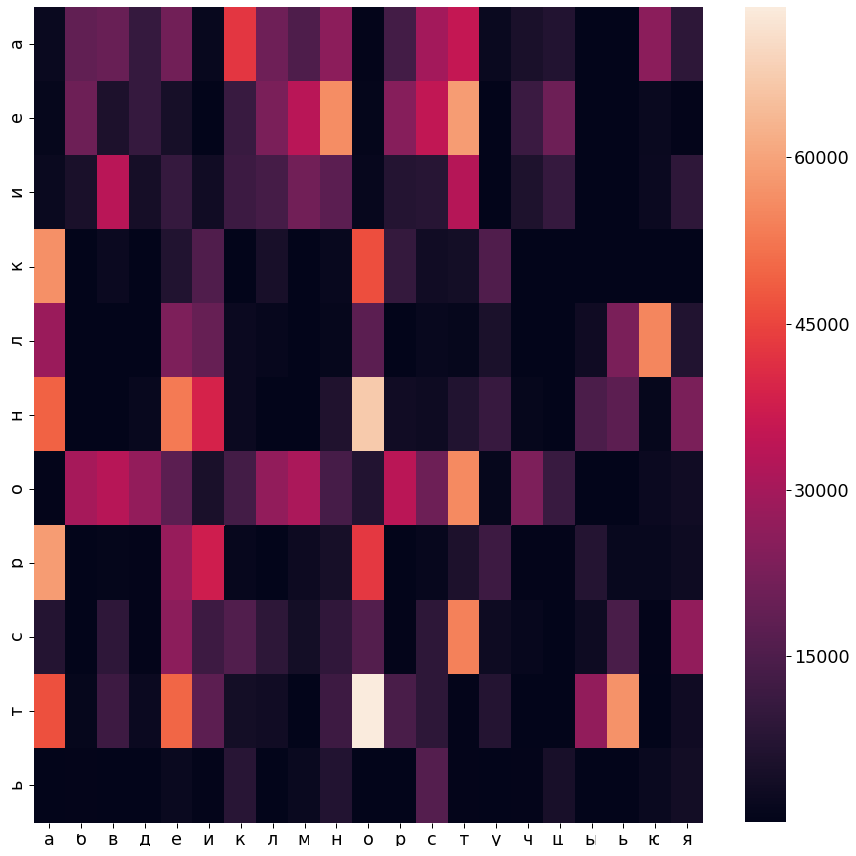

In [33]:
fig, ax = plt.subplots()
ax = sns.heatmap(spRDf, fmt = '')

In [34]:
def generateSparseSame(depth):
    sparseDimension = dict()
    everyL = 0
    partL = 0
    for phrase in phrases:
        words = phrase.split(' ')
        for word in words:
            length = len(word)
            if length > depth:
                for i,letter in enumerate(word):
                    everyL += 1
                    if i+depth < length:
                        if word[i+depth] in [s for s in groups if letter in s][0]:
                            incOrAdd((letter,word[i+depth]), sparseDimension)
                            partL += 1
                            
    return (sparseDimension, everyL, partL)
                

In [35]:
buffer = generateSparseSame(1)
sameSparse = buffer[0]
summ = buffer[1]
part = buffer[2]


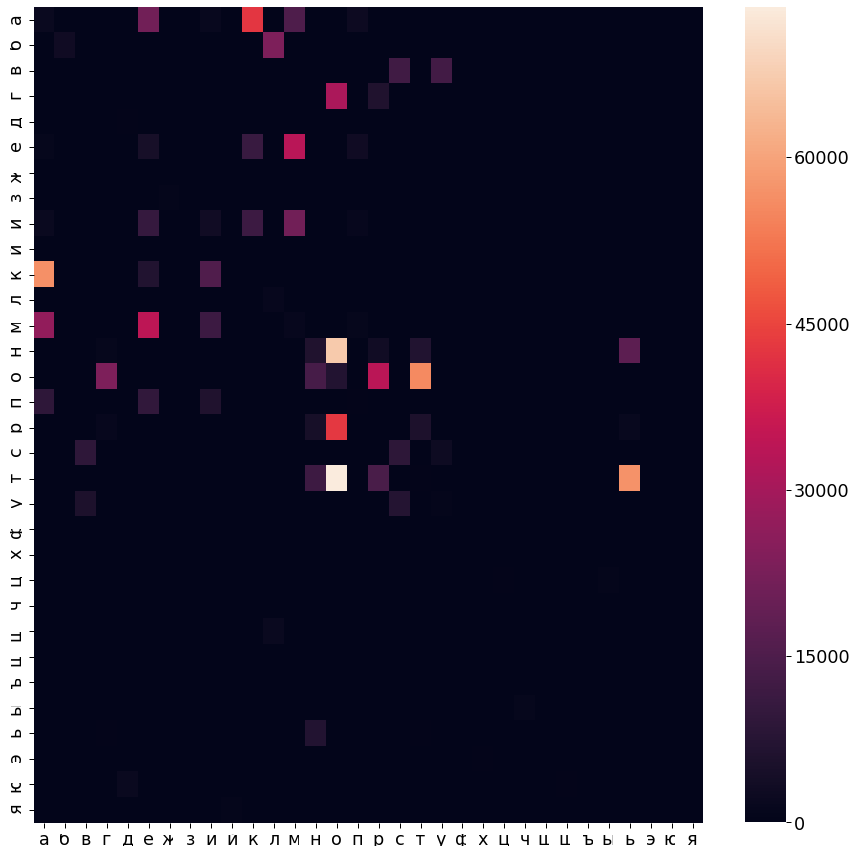

In [36]:
sparseSameArray = np.zeros((delta, delta))
for key in sameSparse:
    sparseSameArray[ord(key[0])-offset][ord(key[1])-offset] = sameSparse[key]
fig, ax = plt.subplots()
ax = sns.heatmap(sparseSameArray, fmt = '', xticklabels=x_axis_labels, yticklabels=x_axis_labels)

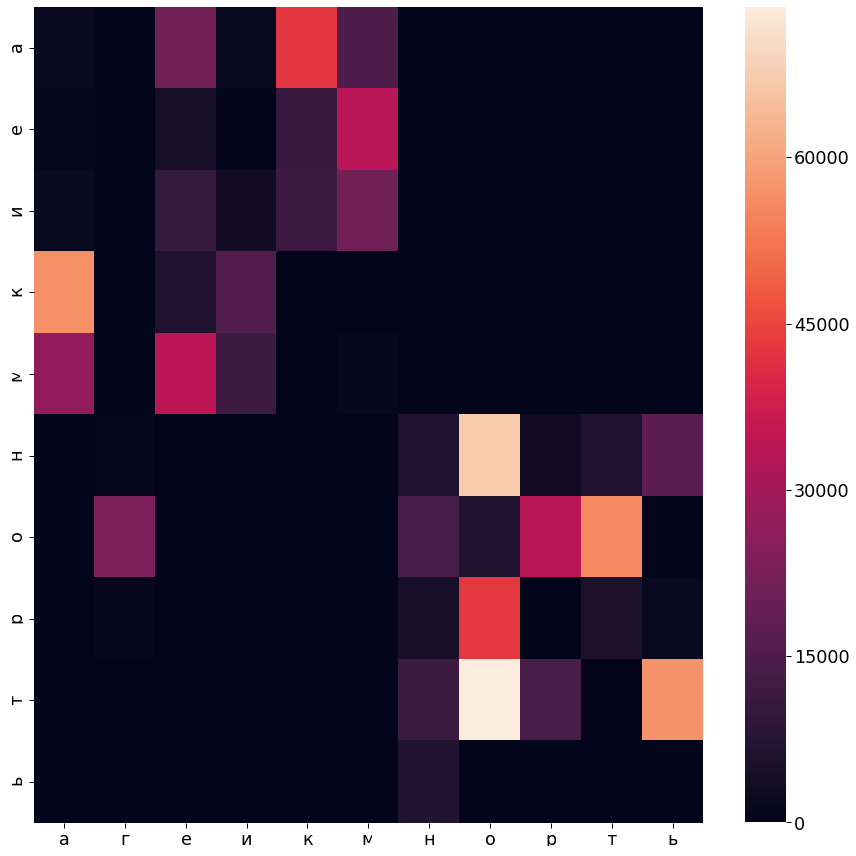

In [37]:
sparSameDf = pd.DataFrame(sparseSameArray)
sparSameDf.columns = x_axis_labels
sparSameDf.index = x_axis_labels
avgSame = sparSameDf.mean().mean()
sSamepRDf = sparSameDf.drop(sparSameDf[sparSameDf.mean() < avgSame].index)
sSamepRDf = sSamepRDf.drop(sSamepRDf.columns[sSamepRDf.mean() < avgSame], axis=1)
fig, ax = plt.subplots()
ax = sns.heatmap(sSamepRDf, fmt = '')

In [38]:
'''sSamepRDf[sSamepRDf.index == 'jj'].sum(axis=1).array[0]'''

"sSamepRDf[sSamepRDf.index == 'jj'].sum(axis=1).array[0]"

In [39]:
sSamepRDf[sSamepRDf.index == 'jj'].sum().aggregate('sum')


0.0

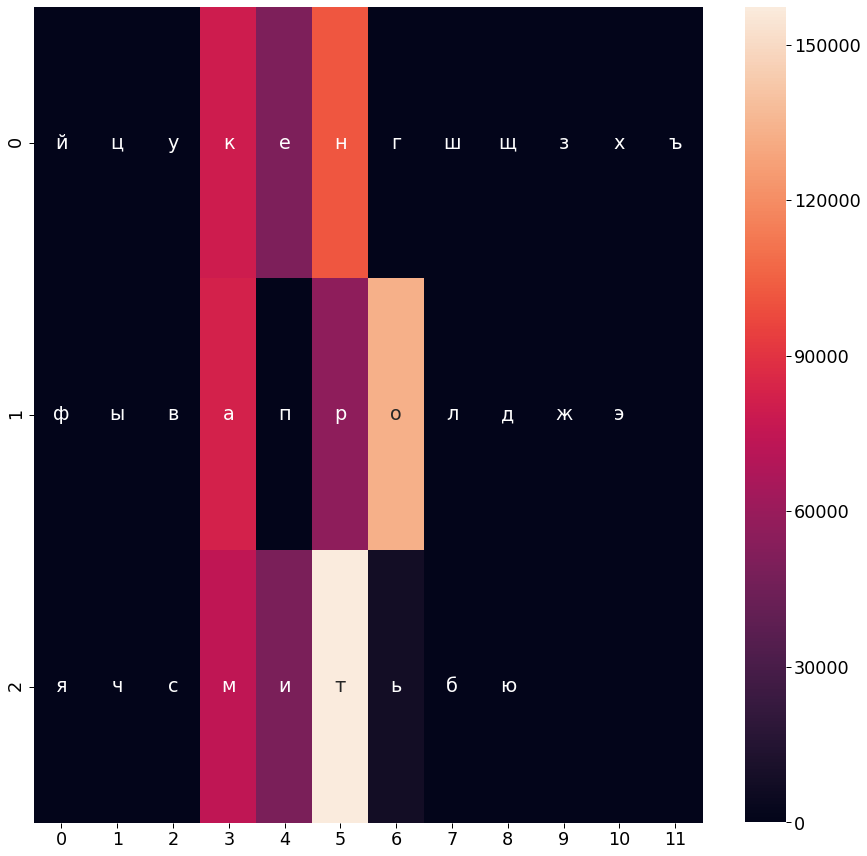

In [40]:
depth = []
for row in labels: 
    drow = []
    for label in row:
        if label != '':
            drow.append(sSamepRDf[sSamepRDf.index == label].sum().aggregate('sum'))
        else: 
            drow.append(0)
    depth.append(drow)
fig, ax = plt.subplots()
ax = sns.heatmap(np.array(depth), annot = np.array(labels), fmt = '')

In [41]:
part/summ

0.18046580988179323

In [42]:
'''matcher function takes label and returns depth'''
def drawLayout(labels, matcher, collapse): 
    depth = []
    for row in labels: 
        if collapse == 1:
            if row != '':
                depth.append(matcher(row))
            else: 
                depth.append(0)
        else:
            drow = []
            for label in row:
                if label != '':
                    drow.append(matcher(label))
                else: 
                    drow.append(0)
            depth.append(drow)
    fig, ax = plt.subplots()
    if collapse == 1:   
        ax = sns.heatmap(np.array([[x] for x in depth]),annot = np.array([[x] for x in labels]),fmt = '')
    else:
        ax = sns.heatmap(np.array(depth),annot = np.array(labels),fmt = '')

In [43]:
def translationMatcher(label):
    return sSamepRDf[sSamepRDf.index == label].sum().aggregate('sum')

def translationMatcherZone(label):
    lablist = [x for x in label]
    return sSamepRDf[sSamepRDf.index.isin(lablist) ].sum().aggregate('sum')

def translationMatcherZoneFull(label):
    lablist = [x for x in label]
    return spRDf[spRDf.index.isin(lablist) ].sum().aggregate('sum')

In [44]:
labelsZone = ['йфя', 'цыч', 'увс', 'камипе', 'нртгоь', 'шлб', 'щдю', 'зжхэъ']

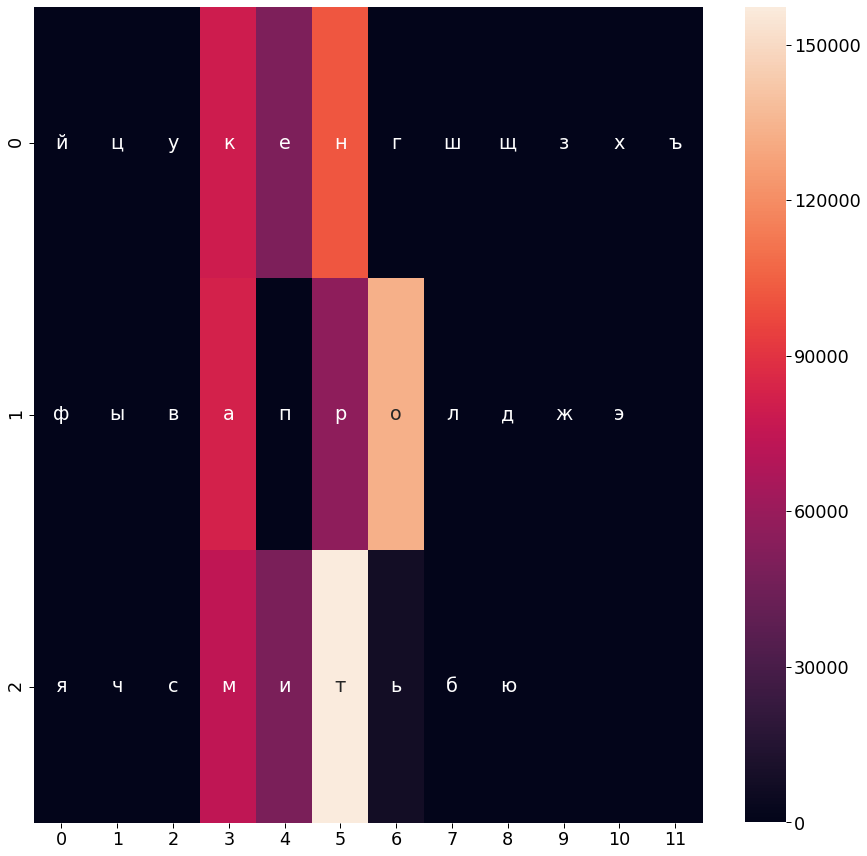

In [45]:
drawLayout(labels, translationMatcher, 0)

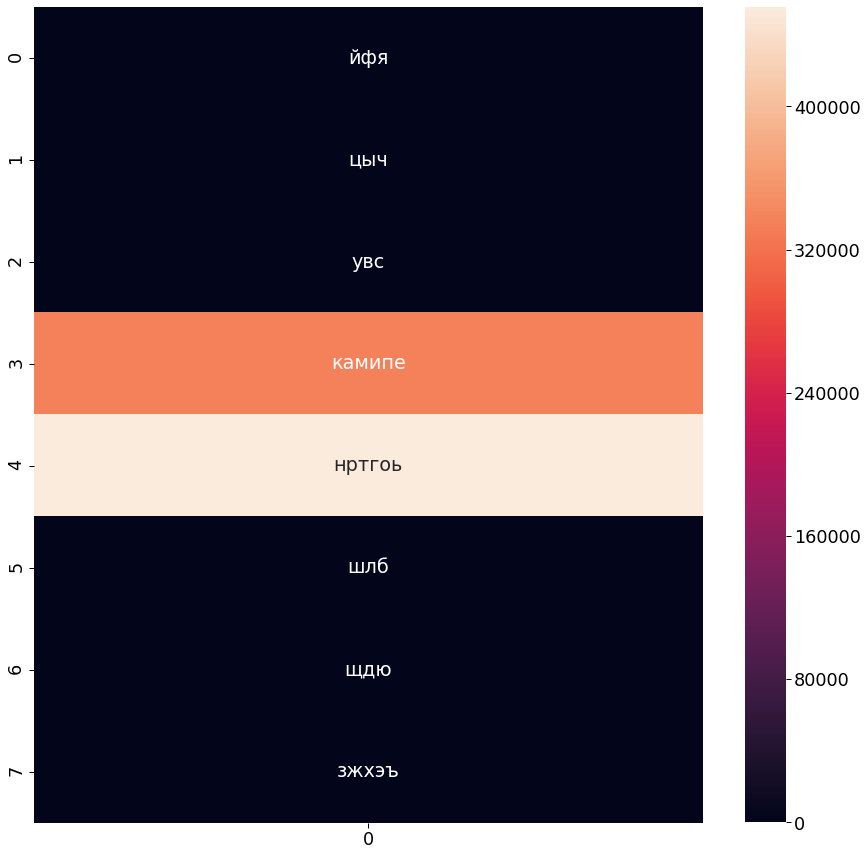

In [46]:
drawLayout(labelsZone, translationMatcherZone, 1)

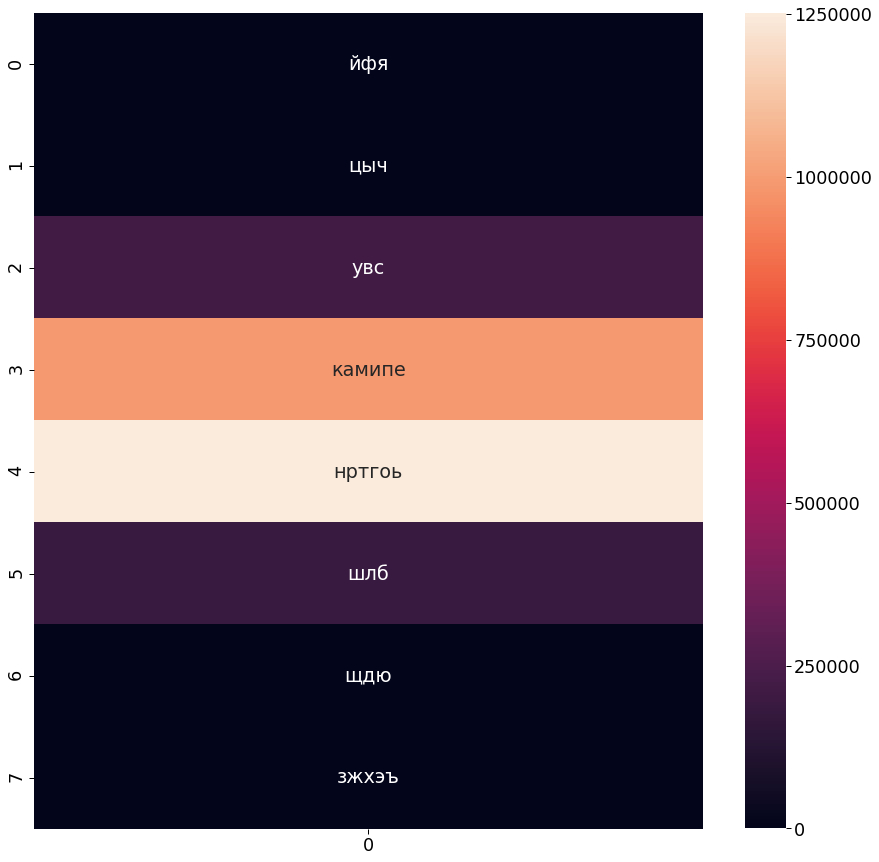

In [47]:
drawLayout(labelsZone, translationMatcherZoneFull, 1)

In [49]:
np.array([1,2,3]).shape

(3,)

In [51]:
def calcUniformity(zones, transDf): #returns summ of positive differences between each zone and average divided by total cases
    def prepUniform(): #returns array of cases by each zone
        calculatedZones = []
        for zone in zones:
            lablist = [x for x in zone]
            calculatedZones.append(transDf[transDf.index.isin(lablist)].sum().aggregate('sum'))
        return calculatedZones
    cZones = prepUniform()
    avgLoad = sum(cZones) / len (cZones)
    positiveDelta = [x - avgLoad for x in cZones if x > avgLoad]
    return sum(positiveDelta)/transDf.sum().aggregate('sum')

In [52]:
calcUniformity(labelsZone, sparDf)

0.3972855371193979

In [54]:
partsY =  ['йфяцычувскамипе', 'нртгоьшлбщдюзжхэъ']

In [76]:
def calcAlteration(parts, transDf): #returns percentage of cases that are not alterated between hands
    case = 0
    for i, part in enumerate(parts):
        lablist = [x for x in part]
        labOplist = [x for x in parts[i - len(parts)]]
        case += transDf[transDf.index.isin(lablist)][labOplist].sum().aggregate('sum')
    return 1- (case/transDf.sum().aggregate('sum'))

In [77]:
calcAlteration(partsY, sparDf)

0.5206742068155112

In [78]:
def calcRepeats(zones, transDf): #returns percentage of cases that lead to repetition of zone
    depth = []
    for zone in zones:
        lablist = [x for x in zone]
        depth.append(transDf[transDf.index.isin(lablist)][lablist].sum().aggregate('sum'))
    return sum(depth)/transDf.sum().aggregate('sum')

In [79]:
calcRepeats(labelsZone, sparDf)

0.2225897213256184

In [276]:
def calcProximity(labels, transDf):
    cases = transDf[transDf.index.isin(labels[1][0:3] + labels[1][6:-2])].sum().aggregate('sum')
    return 1 - (cases/transDf.sum().aggregate('sum'))

In [90]:
def convoluteZone(labels): #returns array of str(letters) by finger zones
    newZone = []
    for x,row in enumerate(labels):
        i = 0
        for y,label in enumerate(row):
            if y in [4,6] or y > 9:
                newZone[i-1] += label
            else: 
                if x==0:
                    newZone.append(label)
                else:
                    newZone[i] += label
                    i += 1
    return newZone
            

In [91]:
convoluteZone(labels)

['йфя', 'цыч', 'увс', 'кеапми', 'нгроть', 'шлб', 'щдю', 'зхъжэ']

In [94]:
def convoluteParts(labels):
    newPart = []
    for x,row in enumerate(labels):
        i = -1
        for y,label in enumerate(row):
            if x==0 and (y==0 or y==5):
                newPart.append(label)
            else:
                if y==0 or y==5:
                    i+=1
                newPart[i] += label
    return newPart

In [95]:
convoluteParts(labels)

['йцукефывапячсми', 'нгшщзхъролджэтьбю']

In [277]:
def calcResults(labels, transDf):
    zones = convoluteZone(labels)
    parts = convoluteParts(labels)
    result = []
    result.append(calcUniformity(zones,transDf))
    result.append(calcAlteration(parts,transDf))
    result.append(calcRepeats(zones,transDf))
    result.append(calcProximity(labels,transDf))
    return result

In [278]:
def fullIteration(labels_, transDf):
    results = []
    def exchange(array, x,y,z,c):
        newArr = copy.deepcopy(array)
        
        newArr[x][y], newArr[z][c] = newArr[z][c], newArr[x][y]
        return newArr
    
    initResult = calcResults(labels_,transDf)
    multipliers = [1/x for x in initResult]
    sumInitResult = sum(initResult)
    for x, row in enumerate(labels_):
        for y, label in enumerate(row):
            for z, rowSec in enumerate(labels_):
                for c, labelSec in enumerate(rowSec):
                    if x != z and y != c and x >= z:

                        newLabels = exchange(labels_, x,y,z,c)
                        newResult = calcResults(newLabels, transDf)
                        weightedResult = [x*multipliers[i] for i,x in enumerate(newResult)]
                        sumNewResult =  sum(weightedResult)#newResult)
                        if sumNewResult < len(initResult): #sumInitResult:
                            weightedResult += [sumNewResult,x,y,z,c,label,labelSec]
                            results.append(weightedResult)
    return results

In [279]:
test = fullIteration(labels, sparDf)

In [203]:
labels

[['й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ'],
 ['ф', 'ы', 'в', 'а', 'п', 'р', 'о', 'л', 'д', 'ж', 'э', ''],
 ['я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю', '', '', '']]

In [268]:
def dfResults(result):
    columns = ['Uniformity', 'Alteration', 'Repeats','Proximity', 'Summ', 'x', 'y', 'z', 'c', 'from', 'to']
    return pd.DataFrame(np.array(result), columns=columns)
    

In [280]:
calcResults(labels,sparDf)

[0.3972855371193979,
 0.5206742068155112,
 0.2225897213256184,
 0.7481253439735829]

In [281]:
dfFst = dfResults(test)

In [193]:
dfFst.sort_values(by=['Summ'])

,Uniformity,Alteration,Repeats,Summ,x,y,z,c,from,to
435,0.32025567463445836,0.48476382959734643,0.17494287249550045,0.9799623767273052,2,5,1,0,т,ф
194,0.32025567463445836,0.48476382959734643,0.17494287249550045,0.9799623767273052,1,0,2,5,ф,т
11,0.32090945685641614,0.48913043478260865,0.17730676121911676,0.9873466528581416,0,0,2,5,й,т
425,0.32090945685641614,0.48913043478260865,0.17730676121911676,0.9873466528581416,2,5,0,0,т,й
25,0.3204385849112734,0.48693806802124084,0.18118087990301804,0.9885575328355323,0,1,2,5,ц,т
...,...,...,...,...,...,...,...,...,...,...
133,0.3972855371193979,0.5206742068155112,0.22251116519656697,1.1404709091314762,0,8,1,11,щ,
139,0.3972855371193979,0.5206742068155112,0.22251116519656697,1.1404709091314762,0,8,2,9,щ,
140,0.3972855371193979,0.5206742068155112,0.22251116519656697,1.1404709091314762,0,8,2,10,щ,
141,0.3972855371193979,0.5206742068155112,0.22251116519656697,1.1404709091314762,0,8,2,11,щ,


In [285]:
dfFst.sort_values(by=['Summ']).head(15)

,Uniformity,Alteration,Repeats,Proximity,Summ,x,y,z,c,from,to
165,0.8061095728692751,0.9310310041325154,0.7859431758737093,0.8970361542949419,3.4201199071704416,2,5,1,0,т,ф
166,0.8276904590720745,0.9351104012798387,0.8057619760119533,0.9084964985215566,3.477059334885423,2,5,1,1,т,ы
155,0.807755195880619,0.9394174483390928,0.7965631124527136,1.0,3.5437357566724255,2,5,0,0,т,й
64,0.8236697100649767,0.9139197654580985,0.9077378000202563,0.9063613143017268,3.551688589845058,1,9,0,4,ж,е
4,0.8282871656030275,0.9233199213313322,0.894231863568637,0.9088133743987903,3.554652324901787,1,0,0,5,ф,н
156,0.8065699729083535,0.9352068177131271,0.813967863493459,1.0,3.5557446541149393,2,5,0,1,т,ц
171,0.8379327511739616,1.0,0.8095031256297464,0.9139355797554837,3.5613714565591916,2,5,1,9,т,ж
3,0.7918465317602901,1.0,0.8836495159894208,0.8894618888411849,3.5649579365908957,1,0,0,4,ф,е
172,0.8104081999177482,1.0,0.7672405602013935,1.0,3.577648760119142,2,5,1,10,т,э
161,0.8070871185685128,1.0,0.7720571728686777,1.0,3.5791442914371907,2,5,0,8,т,щ


In [237]:
dyctL = [['ц','ь','я','','','з','в','к','д','ч','ш','щ'],
         ['у','и','е','о','а','л','н','т','с','р','й',''],
         ['ф','э','х','ы','ю','б','м','п','г','ж','','']]

In [283]:
calcResults(dyctL,sparDf)

[0.21679225576016303,
 0.8141396848830118,
 0.04077063097770307,
 0.5841605743057312]